In [2]:
#sample Dataset

import pandas as pd
pizza = {'diameter':[9, 10, 14, 16, 19],
        'harga' : [7, 10, 11, 13.5, 20]}
pizza_df = pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,9,7.0
1,10,10.0
2,14,11.0
3,16,13.5
4,19,20.0


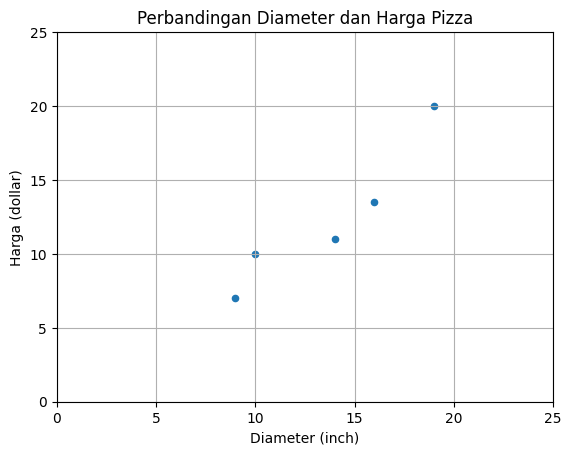

In [3]:
#Visualisasi Data

import matplotlib.pyplot as plt

pizza_df.plot(kind='scatter', x='diameter', y='harga')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

In [9]:
#Penyesuaian Dataset

import numpy as np

X = np.array(pizza_df['diameter'])
Y = np.array(pizza_df['harga'])

print(f'X: {X}')
print(f'y: {Y}')

X: [ 9 10 14 16 19]
y: [ 7.  10.  11.  13.5 20. ]


In [10]:
X= X.reshape(-1, 1)
X.shape

(5, 1)

In [11]:
#Training Simple Linaer Regression Model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
#Visualisasi Simple Linaer Regression Model

X_vis = np.array([0, 25]).reshape(-1, 1)
y_vis = model.predict (X_vis)

<function matplotlib.pyplot.show(close=None, block=None)>

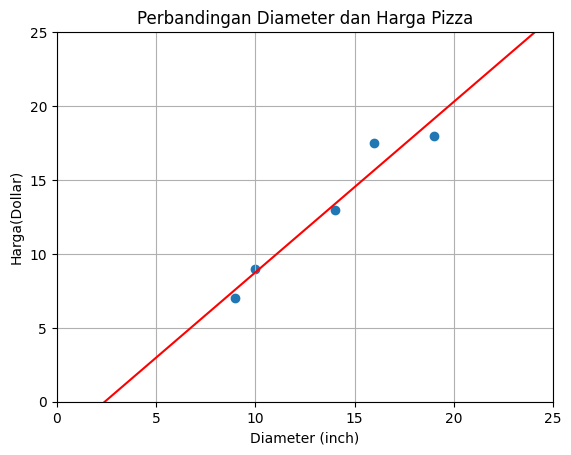

In [74]:
plt.scatter (X, y)
plt.plot(X_vis, y_vis, '-r')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga(Dollar)')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show

In [75]:
#Formula Linear Regression

print (f'intercept : {model.intercept_}')
print (f'slope : {model.coef_}')

intercept : -2.7832369942196493
slope : [1.15317919]


In [76]:
#Mencari nilai slope 

print (f'X : \n(X)\n')
print (f'X flatten: {X.flatten()}\n')
print (f'Y:{y}')

X : 
(X)

X flatten: [ 9 10 14 16 19]

Y:[ 7.   9.  13.  17.5 18. ]


In [77]:
#Mencari variance 

variance_x = np.var(X.flatten(), ddof=1)
print(f'variance : {variance_x}')

variance : 17.299999999999997


In [78]:
#mencari Covariance
np.cov(X.flatten(), y)

array([[17.3 , 19.95],
       [19.95, 24.3 ]])

In [79]:
covariance_xy = np.cov(X.flatten(), y)[0][1]
print (f'covariance : {covariance_xy}')

covariance : 19.95


In [80]:
#Mencari nilai slope 
slope = covariance_xy/variance_x
print (f'slope : {slope}')

slope : 1.1531791907514453


In [81]:
#mencari nilai intercept

intercept = np.mean(y) - slope*np.mean(X)
print(f'intercept : {intercept}')

intercept : -2.7832369942196546


In [82]:
#Data prediksi

diameter_pizza = np.array([14, 25, 27]).reshape(-1,1)
diameter_pizza

array([[14],
       [25],
       [27]])

In [83]:
#Predeksi Harga

prediksi_harga = model.predict(diameter_pizza)
prediksi_harga

array([13.36127168, 26.04624277, 28.35260116])

In [84]:
#hasil prediksi untuk masing-masing data

for dmtr, hrg in zip (diameter_pizza, prediksi_harga) : 
    print(f'Diameter : {dmtr} prediksi harga : {hrg}')

Diameter : [14] prediksi harga : 13.361271676300579
Diameter : [25] prediksi harga : 26.046242774566473
Diameter : [27] prediksi harga : 28.352601156069362


In [85]:
#Training & Testing Dataset

X_train = np.array([4, 6, 8, 15, 19]).reshape(-1, 1)
y_train = np.array([7, 8, 12, 14, 20])

X_test = np.array([6, 7, 10, 13, 18]).reshape(-1,1)
y_test = np.array([9, 8, 12, 14, 17])

In [86]:
#Training Simple Linear Regression Model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [89]:
#Evaluasi Linear Regression Model dengan Coefficient of Determination atau R-Squared (R2)

from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r_squared = r2_score (y_test, y_pred)
print (f'R-Squared : {r_squared}')

R-Squared : 0.9275052718981321


In [90]:
#Mencari SSres
ss_res = sum((y_i - model.predict(x_i.reshape(-1, 1))[0])**2 
    for x_i, y_i in zip(X_test, y_test))
print(f'ss_res : {ss_res}')


ss_res : 3.914715317500864


In [91]:
#Mencari SStot
mean_y = np.mean(y_test)
ss_tot = sum ([(y_i - mean_y)**2 for y_i in y_test])
print (f'ss_tot : {ss_tot}')

ss_tot : 54.0


In [92]:
#r_squared (hasil sama dengan penggunaan library r2 )

r_squared = 1 - (ss_res/ss_tot)
print (f'R_Squared : {r_squared}')

R_Squared : 0.9275052718981321
